# Poblem 1

## (a)

The variable yi is a Bernoulli variable with $p=1-e^{-\lambda}$ so $$f(y) = (1-e^{-\lambda})^{-y}(e^{-\lambda})^{1-y}$$
Thus the Likelihood Function will be:

\begin{align}
L(Y_1,...Y_n, \lambda) &= \prod_{i=1}^n(1-e^{-\lambda})^{y_i}(e^{-\lambda})^{1-y_i} \\
&= e^{-\lambda \sum_{i=1}^n(1-y_i)} (1-e^{-\lambda})^{\sum_{i=1}^n y_i}
\end{align}

Taking the logarithm, we get:
\begin{align}
ln(Y_1,...Y_n, \lambda) &= ln(e^{-\lambda \sum_{i=1}^n(1-y_i)} (1-e^{-\lambda})^{\sum_{i=1}^n y_i}) \\
&= -\lambda(n-\sum_{i=1}^ny_i)+\sum_{i=1}^ny_i ln(1-e^{-\lambda})
\end{align}

By taking the derivative and setting it to zero, we get:

\begin{align}
0 &= \sum_{i=1}^ny_i - n + \sum_{i=1}^ny_i\frac{1}{e^\lambda_{MLE}-1} \\
\lambda_{MLE} &= ln\Big(\frac{\sum_{i=1}^ny_i}{n-\sum_{i=1}^ny_i}+1\Big)
\end{align}

## (b)


In [16]:
options(warn=-1)

nsamples=1000 
samplesize=50
r2_50 = matrix(rpois(nsamples*samplesize, lambda=2), nrow=samplesize, ncol=nsamples)
r02_50 = matrix(rpois(nsamples*samplesize, lambda=0.2), nrow=samplesize, ncol=nsamples)
samplesize=200
r2_200 = matrix(rpois(nsamples*samplesize, lambda=2), nrow=samplesize, ncol=nsamples)
r02_200 = matrix(rpois(nsamples*samplesize, lambda=0.2), nrow=samplesize, ncol=nsamples)

r02_50_dist = colMeans(r02_50)
r02_200_dist = colMeans(r02_200)
r2_50_dist = colMeans(r2_50)
r2_200_dist = colMeans(r2_200)


In [17]:
r2_50_t = ifelse(r2_50!=0, 1,0)
r2_200_t = ifelse(r2_200!=0, 1,0)
r02_50_t = ifelse(r02_50!=0, 1,0)
r02_200_t = ifelse(r02_200!=0, 1,0)

r2_50_t_dist = colMeans(r2_50_t)
r2_200_t_dist = colMeans(r2_200_t)
r02_50_t_dist = colMeans(r02_50_t)
r02_200_t_dist = colMeans(r02_200_t)


In [18]:
r2_50_mle=1/50*(colSums(r2_50))
r2_200_mle=1/200*(colSums(r2_200))
r02_50_mle=1/50*(colSums(r02_50))
r02_200_mle=1/200*(colSums(r02_200))

r2_50_t_mle = log(colSums(r2_50_t)/(50-colSums(r2_50_t))+1)
r2_200_t_mle = log(colSums(r2_200_t)/(200-colSums(r2_200_t))+1)
r02_50_t_mle = log(colSums(r02_50_t)/(50-colSums(r02_50_t))+1)
r02_200_t_mle = log(colSums(r02_200_t)/(200-colSums(r02_200_t))+1)


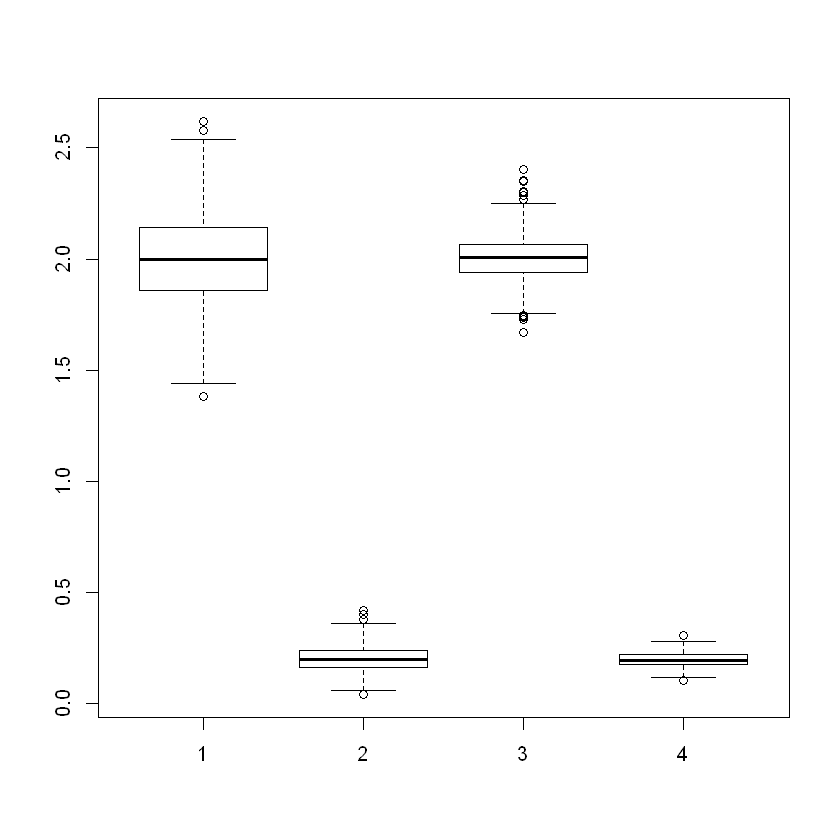

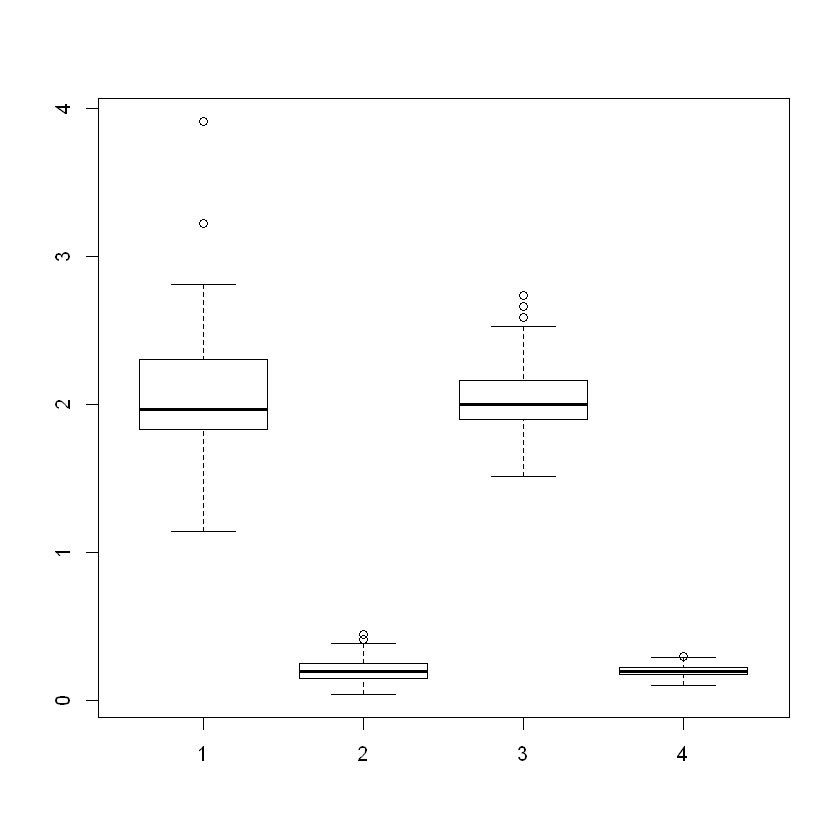

In [19]:
boxplot(r2_50_mle, r02_50_mle, r2_200_mle, r02_200_mle)
boxplot(r2_50_t_mle, r02_50_t_mle, r2_200_t_mle, r02_200_t_mle)

In [20]:
cat(mean(r2_50_mle), mean(r2_200_mle), mean(r02_50_mle), mean(r02_200_mle), "\n")
cat(sd(r2_50_mle), sd(r2_200_mle), sd(r02_50_mle), sd(r02_200_mle))
cat("\n\nTruncated MLE: \n\n")
cat(mean(r2_50_t_mle), mean(r2_200_t_mle), mean(r02_50_t_mle), mean(r02_200_t_mle), "\n")
cat(sd(r2_50_t_mle), sd(r2_200_t_mle), sd(r02_50_t_mle), sd(r02_200_t_mle))

2.00308 2.00328 0.19742 0.198165 
0.1959043 0.09936405 0.06035052 0.03226296

Truncated MLE: 

2.064381 2.029564 0.1992984 0.1984418 
0.4124002 0.1788553 0.06417971 0.03398784

## (c)



In [21]:
cat(var(r2_200_mle)/var(r2_200_t_mle), "\n")
cat(var(r02_200_mle)/var(r02_200_t_mle), "\n")
cat(var(r2_50_mle), var(r2_200_mle), var(r02_50_mle), var(r02_200_mle),"\n")
cat(var(r2_50_t_mle), var(r2_200_t_mle), var(r02_50_t_mle), var(r02_200_t_mle),"\n")

0.308642 
0.9010759 
0.03837849 0.009873215 0.003642186 0.001040899 
0.1700739 0.03198921 0.004119035 0.001155173 


We can see that the relative efficiency of the regular vs the truncated MLE estimator increases as $\lambda$ drops and the absolute efficiency of both gets better (variance decreases) as the sample size increases, while it also improves whel $\lambda$ decreases.


# Problem 2

## (a)

In [22]:
library(MASS)
set.seed(1)
list.samplesize<-c(100,400,800,1600)
for (samplesize in list.samplesize){assign(paste("sample.gamma",samplesize,sep="."),rgamma(samplesize, shape=3,rate=2))}
mlefit.sample.gamma.100<-fitdistr(sample.gamma.100,densfun="gamma")
mlefit.sample.gamma.400<-fitdistr(sample.gamma.400,densfun="gamma")
mlefit.sample.gamma.800<-fitdistr(sample.gamma.800,densfun="gamma")
mlefit.sample.gamma.1600<-fitdistr(sample.gamma.1600,densfun="gamma")

## (2b)

In [23]:
mlefit.sample.gamma.100$sd
mlefit.sample.gamma.400$sd
mlefit.sample.gamma.800$sd
mlefit.sample.gamma.1600$sd



shape      rate 
0.5109480 0.3748789

shape      rate 
0.1872558 0.1381376

shape       rate 
0.13329736 0.09469172

shape       rate 
0.10564925 0.07574124

We can see that the standard deviation decreases as the sample size increases. This is consistent with the theory.

## (c)

In [24]:
mydgamma <- function(x, a, b){
    
    if (x>0){
        g = (1/gamma(a))*(b^a)*x^(a-1)*exp(-b*x)
    }
    else{
        print("ERROR")
    }
    
    return(g)
    
}


## (d)

In [25]:
library(microbenchmark)
microbm.1<-microbenchmark(
   sample <- fitdistr(sample.gamma.100,densfun="gamma"),
    sample <- fitdistr(sample.gamma.100,densfun=mydgamma, list(a = 1, b=1))
)


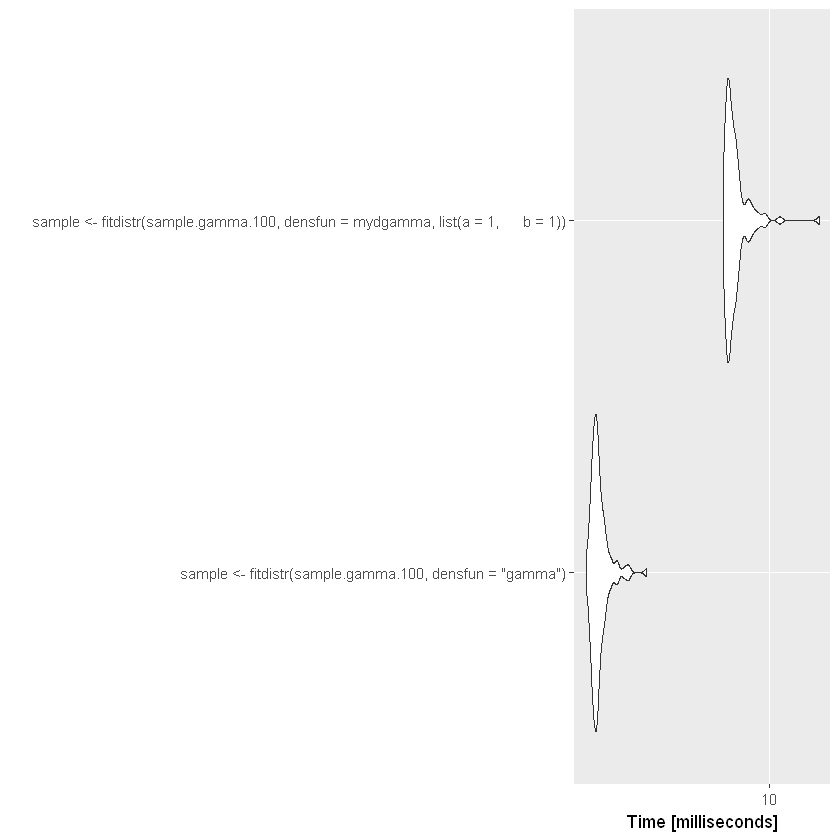

In [26]:
library(ggplot2)
autoplot(microbm.1)

The function ```fitdistr()``` is slower with ```mydgamma()``` mainly because it has not been more optimized. We could potentially change this behavior by choosing different start values.



# Problem 3
## (a)



\begin{align}
E[X] &= \frac{1}{2b} \int xe^{\frac{-|x-\mu|}{b}}dx \\
&= \frac{1}{2b} \int (bt+\mu)e^{-|t|}bdt \\
&= \mu \int_0^\infty e^{-t}dt \\
&= \mu
\end{align}

The above comes from a substitution $(t = \frac{x-\mu}{b})$ and from the fact that $\int te^{-|t|} = 0$ since it's odd and $\int_{-\infty}^\infty e^{-|t|} = 2\int_0^\infty e^{-t}$.

Similarly, for the variance we have:

\begin{align}
E[X^2] & = \int x^2f(x)dx \\
&= \frac{1}{2b} \int x^2 e^{\frac{-|x-\mu|}{b}}dx \\
&= \frac{1}{2b} \int (bt+\mu)^2e^{-|t|}bdt\\
&=\int_0^\infty ((bt)^2+\mu^2)e^{-t}dt\\
&=\mu^2 \int_0^\infty e^{-t}dt+b^2\int_0^\infty t^2e^{-t}dt\\
&= \mu^2 + 2b^2
\end{align}

## (b)
For the MLE, we get:

\begin{align}
L(X_i,..,X_n, \mu, b) &= \prod_{i=1}^n\frac{1}{2b}e^{-\frac{|X_i-\mu|}{b}} \\
&= (\frac{1}{2b})^n e^{-\frac{\sum_{i=1}^n|X_i-\mu|}{b}}\\
ln(X_i,..,X_n, \mu, b) &= -nlog(2b) -\frac{\sum_{i=1}^n|X_i-\mu|}{b}
\end{align}

By taking the derivative with respect to $\mu$, we see that the function is minimized for $$\sum_{i=1}^n|X_i-\mu|=0 \Rightarrow \hat{\mu} = \frac{1}{n}\sum_{i=1}^nX_i$$

When taking the derivative with respect to $b$, we have: $$-\frac{n}{b}-\frac{1}{b^2}\sum_{i=1}^n|X_i-\mu|=0\\
\Rightarrow n = \frac{1}{b}\sum_{i=1}^n|X_i-\mu| \\ \Rightarrow \hat{b} = \frac{1}{n}\sum_{i=1}^n|X_i-\mu|$$


## (c)

In [43]:
library(zoo)
# setwd("./Downloads")
.libPaths("C:/Users/dkout/Documents/R/win-library/3.4")
SP500 <- read.zoo(file="SP500.csv")

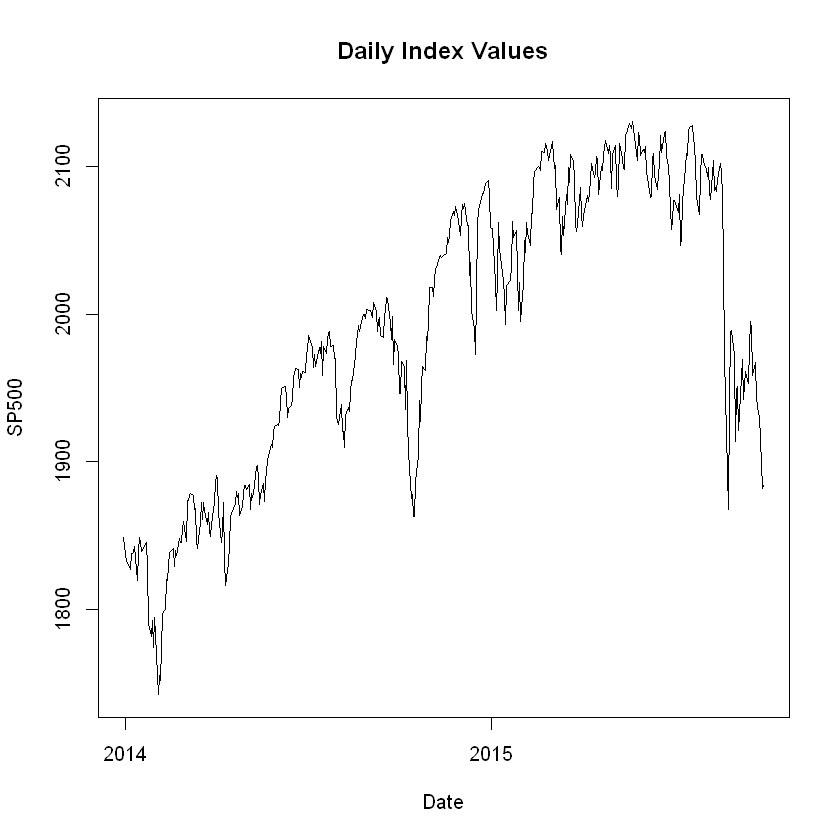

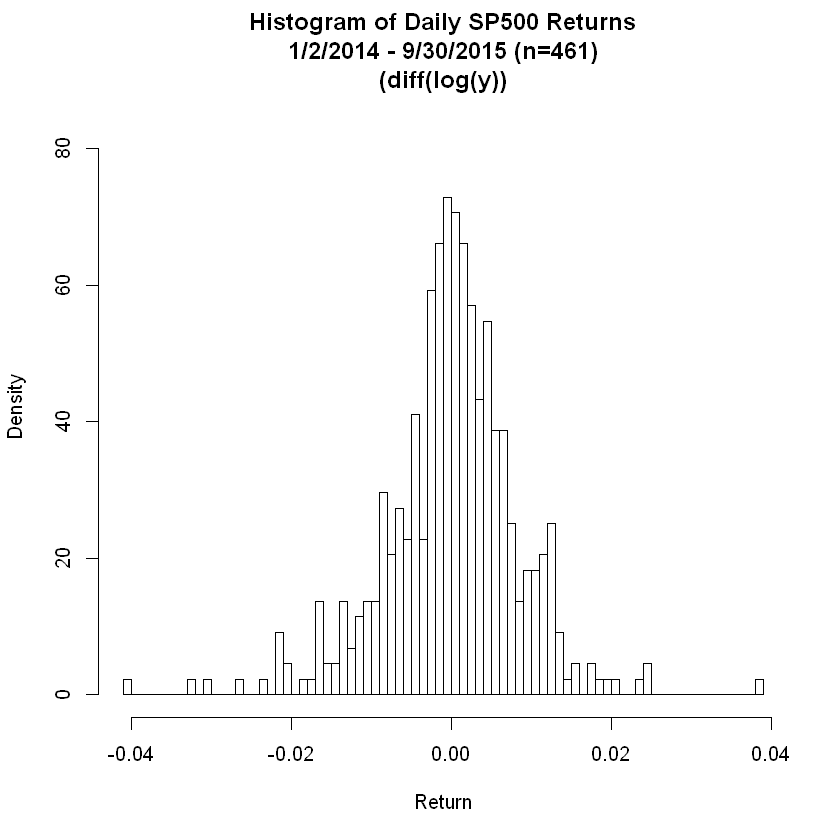

In [39]:
par(mfcol=c(1,1))
plot(SP500, main="Daily Index Values", xlab="Date")
y<-diff(log(SP500))
hist( y, breaks=100,ylab="Density",xlab="Return",freq=FALSE,ylim=c(0,84.),main=paste(c("Histogram of Daily SP500 Returns","1/2/2014 - 9/30/2015 (n=461)","(diff(log(y))"),collapse="\n"))


In [40]:
#Moments:

mu_mom=mean(y)
b_mom = sqrt((var(y)+mean(y)^2-mu_mom^2)/2)
mu_mle = mean(y)
b_mle = sum(abs(y-mu_mle))/length(y)

cat(mu_mom, b_mom, mu_mle, b_mle)

4.361316e-05 0.005948328 4.361316e-05 0.006034661

## (d)

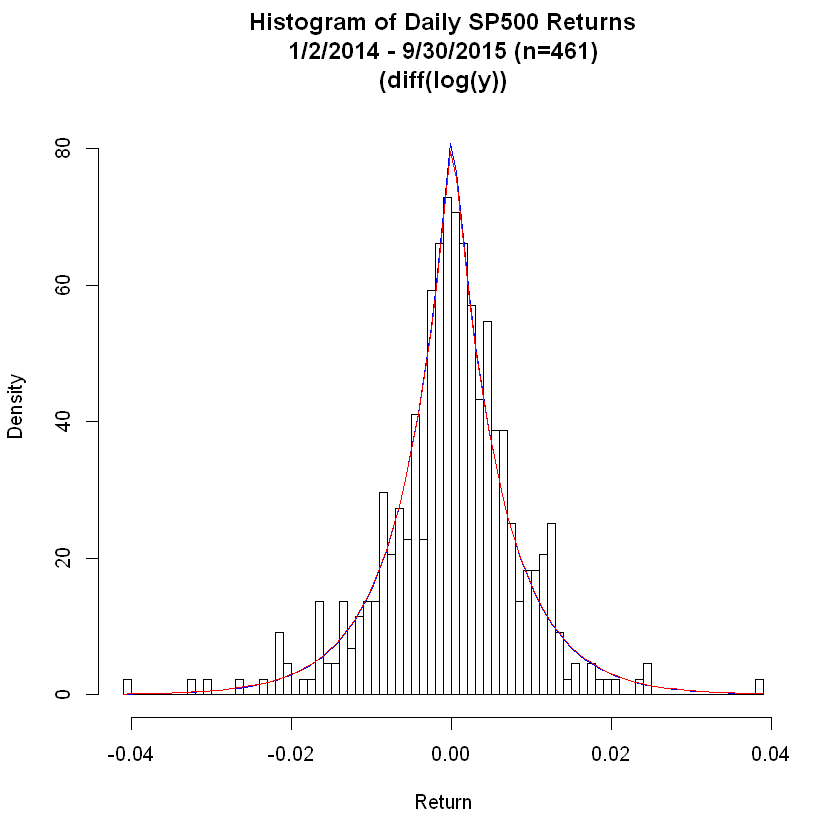

In [46]:
library(rmutil)
hist( y, breaks=100,ylab="Density",xlab="Return",freq=FALSE,ylim=c(0,84.),main=paste(c("Histogram of Daily SP500 Returns","1/2/2014 - 9/30/2015 (n=461)","(diff(log(y))"),collapse="\n"))
curve(dlaplace(x, mu_mom, b_mom), add = TRUE, col = "blue")
curve(dlaplace(x, mu_mle, b_mle), add = TRUE, col = "red")


Both methods yield very similar and quite accurate results. We can see the MLE in red and the method of moments in blue.

## (e)


In [47]:
mydlaplace<-function(x, location=0,scale=1){
dx=(0.5/scale)* exp(-abs(x-location)/scale)
}

## (f)

In [48]:


mlefit <- fitdistr(y,densfun=mydlaplace, list(location = 0, scale=1))
mlefit$estimate
cat("Scale difference with MLE in sd", (mlefit$estimate["scale"] - b_mom)/mlefit$sd["scale"], "\n")
cat("Scale difference with Moments in sd",(mlefit$estimate["scale"] - b_mle)/mlefit$sd["scale"], "\n")
cat("Location difference with Moments in sd",(mlefit$estimate["location"] - mu_mom)/mlefit$sd["location"], "\n")
cat("Location difference with MLE in sd",(mlefit$estimate["location"] - mu_mle)/mlefit$sd["location"], "\n")

location        scale 
0.0004299156 0.0060462367

Scale difference with MLE in sd 0.3686043 
Scale difference with Moments in sd 0.04358039 
Location difference with Moments in sd 1.235272 
Location difference with MLE in sd 1.235272 


The difference is about 0.4 standard deviations for the scale variable (b) and 1.2 for the mean. This is not a huge difference as can be seen in the next graph (green corresponds to the fitdistr).

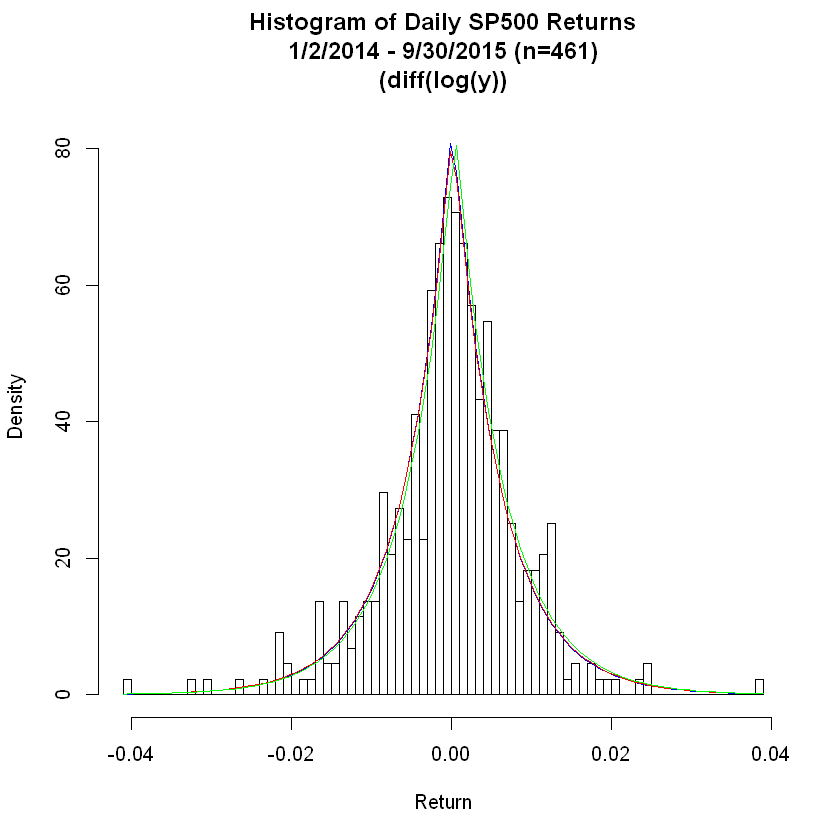

In [49]:
library(rmutil)
hist( y, breaks=100,ylab="Density",xlab="Return",freq=FALSE,ylim=c(0,84.),main=paste(c("Histogram of Daily SP500 Returns","1/2/2014 - 9/30/2015 (n=461)","(diff(log(y))"),collapse="\n"))
curve(dlaplace(x, mu_mom, b_mom), add = TRUE, col = "blue")
curve(dlaplace(x, mu_mle, b_mle), add = TRUE, col = "red")

curve(dlaplace(x, mlefit$estimate["location"], mlefit$estimate["scale"]), add = TRUE, col = "green")

# Problem 5

## (a)

By applying the Newton Method to minimize the error $\vec{\epsilon} = \vec{y}-X\vec{\beta}$, we have:

\begin{align}
\vec{\beta_1} &= \vec{\beta_0} - \frac{f(\vec{\beta_0)}}{f'(\vec{\beta_0)}}\\
&= \vec{\beta_0} + \frac{\vec{y}-X\vec{\beta_0}}{X} \\
&= \vec{\beta_0}- \vec{\beta_0} + X^{-1}\vec{y} \\
&= X^{-1}\vec{y}
\end{align}

## (b)

\begin{align}
\vec{\beta_1} &= X^{-1}\vec{y} \\
&= X^{-1}\cdot I \vec{y} \\
&= X^{-1}\cdot (X^T)^{-1}X^T \vec{y} \\
&= X^{-1}(X^T)^{-1} \cdot X^T \vec{y} \\
&= (X^TX)^{-1} \cdot X^T \vec{y}  = \hat{\beta}
\end{align}

## (c) 

Since our final solution $\beta_1 = \hat{\beta}$ does not depend on $\epsilon$, or $\sigma$, this will not depend on the value of $\sigma^2$ and thus will work for any uknown variance.